In [2]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
from sklearn.preprocessing import MinMaxScaler
from time import time
from os import path

In [3]:
from tensorflow.keras.layers import Dense, Dropout
#Ustvarimo funkcijo, ki vrača kompajlan model
def create_model(activation='sigmoid', optimizer='adam'):
    
    model = tf.keras.models.Sequential()
    model.add(Dense(3, input_dim=3, activation=activation))
    model.add(Dense(81, activation=activation))
    #model.add(Dropout(0.2))
    model.add(Dense(81, activation=activation))
    #model.add(Dropout(0.2))
    model.add(Dense(81, activation=activation))
    #model.add(Dropout(0.2))
    model.add(Dense(81, activation=activation))
    #model.add(Dropout(0.2))
    model.add(Dense(3, activation='sigmoid'))

    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mae'])

    return model

In [4]:
from sklearn.model_selection import KFold

In [2]:
if(path.exists("data/data-2.npy") != 1):
    print("Generating data.")
    n = int(tmax/dt) + 1
    data = np.zeros((n, 3))

    i = 0
    start = time()
    while t < tmax:
        y_ATM = solver_ATM.integrate(t+dt)
        #y0_MOD = solver_MOD.integrate(t+dt)
        data[i, :] = y_ATM[:]
        i = i + 1
        t += dt
    print("Elasped time: %0.3g s" %(time()-start))
    data = data[1000:] # only use data from the attractor (after time = 10000 * dt)
    print("Integration finished.")
    np.save("data/data-2.npy", data)
    
else:
    print("Data exist.")
    data = np.load("data/data-2.npy")
    print("Data loaded.")
    
#PREPROCESS DATA
x_train = data[:-1,:]
y_train = data[1:, :] - data[:-1, :]

x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

x_scaler.fit(x_train)
y_scaler.fit(y_train)

x_train_norm=x_scaler.transform(x_train)
y_train_norm=y_scaler.transform(y_train)

xy_train_norm=np.concatenate((x_train_norm,y_train_norm), axis=1)

new_order=np.random.choice(range(x_train.shape[0]),x_train.shape[0],replace=False)
x_train_norm=x_train_norm[new_order]
y_train_norm=y_train_norm[new_order]

NameError: name 'path' is not defined

In [1]:
X = x_train_norm
Y = y_train_norm
len(X)

NameError: name 'x_train_norm' is not defined

In [7]:


num_folds = 3 # dolocimo st. foldov
kf = KFold(n_splits=num_folds, shuffle=True) # razred za razdelitev podatkov

fold_no = 1
scores_per_fold = []
verbose=2
losses = []

# ce nasa Loss ne vec pade se ustavi minimizacija
callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=20, verbose=0, mode='min') 
#ce dosezemo plato zmanjsamo korak ucenja
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='mae', factor=0.9, patience=5, min_lr=0.0001)

    
for train, test in kf.split(X[:len(X)], Y[:len(Y)]): #zanka cez vse usne ter testne sete
    modelCV = create_model()
    start=time()
    history = modelCV.fit(X[train], Y[train], epochs=100, batch_size=1024, verbose=verbose,
                          callbacks=[callback,reduce_lr])
    print("Trained in %0.3g" %(time()-start))
    # na fitanem modelu izvrednotimo mere uspesnosti
    # mere uspesnosti bi lahko spremljali ze tekom ucenja, znotraj metode fit
    scores = modelCV.evaluate(X[test], Y[test], verbose=verbose)
    print(f'Score per fold {fold_no}: {modelCV.metrics_names} of {scores}')
    scores_per_fold.append(scores)
    
    losses.append(history.history['loss'])
    fold_no += 1

Epoch 1/100
651/651 - 2s - loss: 0.0346 - mae: 0.0346
Epoch 2/100
651/651 - 2s - loss: 0.0322 - mae: 0.0322
Epoch 3/100
651/651 - 2s - loss: 0.0232 - mae: 0.0232
Epoch 4/100
651/651 - 2s - loss: 0.0181 - mae: 0.0181
Epoch 5/100
651/651 - 2s - loss: 0.0182 - mae: 0.0182
Epoch 6/100
651/651 - 2s - loss: 0.0181 - mae: 0.0181
Epoch 7/100
651/651 - 2s - loss: 0.0181 - mae: 0.0181
Epoch 8/100
651/651 - 2s - loss: 0.0180 - mae: 0.0180
Epoch 9/100
651/651 - 2s - loss: 0.0180 - mae: 0.0180
Epoch 10/100
651/651 - 2s - loss: 0.0180 - mae: 0.0180
Epoch 11/100
651/651 - 2s - loss: 0.0179 - mae: 0.0179
Epoch 12/100
651/651 - 2s - loss: 0.0179 - mae: 0.0179
Epoch 13/100
651/651 - 2s - loss: 0.0178 - mae: 0.0178
Epoch 14/100
651/651 - 2s - loss: 0.0177 - mae: 0.0177
Epoch 15/100
651/651 - 2s - loss: 0.0177 - mae: 0.0177
Epoch 16/100
651/651 - 2s - loss: 0.0177 - mae: 0.0177
Epoch 17/100
651/651 - 2s - loss: 0.0176 - mae: 0.0176
Epoch 18/100
651/651 - 2s - loss: 0.0175 - mae: 0.0175
Epoch 19/100
651/65

Epoch 48/100
651/651 - 2s - loss: 0.0025 - mae: 0.0025
Epoch 49/100
651/651 - 2s - loss: 0.0025 - mae: 0.0025
Epoch 50/100
651/651 - 2s - loss: 0.0025 - mae: 0.0025
Epoch 51/100
651/651 - 2s - loss: 0.0025 - mae: 0.0025
Epoch 52/100
651/651 - 2s - loss: 0.0025 - mae: 0.0025
Epoch 53/100
651/651 - 2s - loss: 0.0024 - mae: 0.0024
Epoch 54/100
651/651 - 2s - loss: 0.0025 - mae: 0.0025
Epoch 55/100
651/651 - 2s - loss: 0.0024 - mae: 0.0024
Epoch 56/100
651/651 - 2s - loss: 0.0024 - mae: 0.0024
Epoch 57/100
651/651 - 2s - loss: 0.0023 - mae: 0.0023
Epoch 58/100
651/651 - 2s - loss: 0.0024 - mae: 0.0024
Epoch 59/100
651/651 - 2s - loss: 0.0023 - mae: 0.0023
Epoch 60/100
651/651 - 2s - loss: 0.0023 - mae: 0.0023
Epoch 61/100
651/651 - 2s - loss: 0.0023 - mae: 0.0023
Epoch 62/100
651/651 - 2s - loss: 0.0023 - mae: 0.0023
Epoch 63/100
651/651 - 2s - loss: 0.0022 - mae: 0.0022
Epoch 64/100
651/651 - 2s - loss: 0.0022 - mae: 0.0022
Epoch 65/100
651/651 - 2s - loss: 0.0021 - mae: 0.0021
Epoch 66/1

Epoch 95/100
651/651 - 2s - loss: 0.0011 - mae: 0.0011
Epoch 96/100
651/651 - 2s - loss: 0.0010 - mae: 0.0010
Epoch 97/100
651/651 - 2s - loss: 0.0011 - mae: 0.0011
Epoch 98/100
651/651 - 2s - loss: 0.0011 - mae: 0.0011
Epoch 99/100
651/651 - 2s - loss: 9.3658e-04 - mae: 9.3658e-04
Epoch 100/100
651/651 - 2s - loss: 0.0010 - mae: 0.0010
Trained in 190
10407/10407 - 5s - loss: 0.0012 - mae: 0.0012
Score per fold 3: ['loss', 'mae'] of [0.0012349747121334076, 0.0012349747121334076]


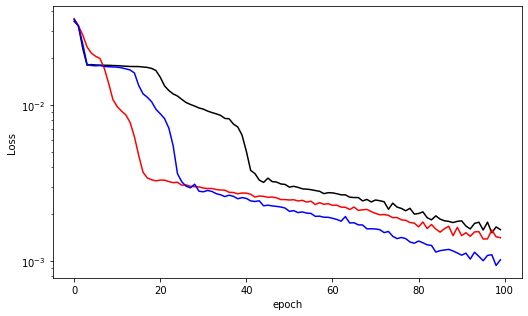

In [8]:
plt.figure(figsize=(7.5, 4.5))
colors=['k','r','b']
for i in range(3):
    plt.plot(losses[i][:], c=colors[i])

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.tight_layout()
#plt.ylim([0, 0.005])
plt.yscale('log')
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor # Wrapper za Keras model v sklearn

modelGS = KerasRegressor(build_fn=create_model, verbose=2) #ustvarimo model
#veljavni argumenti so argumenti funkcije create_model ter metode fit za Keras model

# najprej dolocimo optimalen batch_size ter stevilo epoh
# uspesnot modela ovrednotimo na vseh kombinacijah parametrov
batch_size = [1024]#, 512] # vrednosti, ki jih preverimo
epochs = [100]
activation=['relu', 'sigmoid']
optimizer = ['adam']#, 'RMSprop']

# ustvarimo slovar kjer so kljuci imena parametrov
param_grid = dict(optimizer=optimizer, activation=activation, batch_size=batch_size, epochs=epochs)

#ustvarimo objekt z iskanje na mrezi
# specificiramo katero mero uspesnosti gledamo, default je loss funkcija
grid = GridSearchCV(estimator=modelGS, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', verbose=2)


In [10]:
grid.fit(X[:len(X)], Y[:len(X)])

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  9.3min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  9.6min finished


Epoch 1/100
976/976 - 3s - loss: 0.0185 - mae: 0.0185
Epoch 2/100
976/976 - 3s - loss: 0.0028 - mae: 0.0028
Epoch 3/100
976/976 - 3s - loss: 0.0021 - mae: 0.0021
Epoch 4/100
976/976 - 3s - loss: 0.0018 - mae: 0.0018
Epoch 5/100
976/976 - 3s - loss: 0.0017 - mae: 0.0017
Epoch 6/100
976/976 - 3s - loss: 0.0015 - mae: 0.0015
Epoch 7/100
976/976 - 3s - loss: 0.0015 - mae: 0.0015
Epoch 8/100
976/976 - 3s - loss: 0.0015 - mae: 0.0015
Epoch 9/100
976/976 - 3s - loss: 0.0013 - mae: 0.0013
Epoch 10/100
976/976 - 3s - loss: 0.0013 - mae: 0.0013
Epoch 11/100
976/976 - 3s - loss: 0.0014 - mae: 0.0014
Epoch 12/100
976/976 - 3s - loss: 0.0014 - mae: 0.0014
Epoch 13/100
976/976 - 3s - loss: 0.0012 - mae: 0.0012
Epoch 14/100
976/976 - 3s - loss: 0.0013 - mae: 0.0013
Epoch 15/100
976/976 - 3s - loss: 0.0012 - mae: 0.0012
Epoch 16/100
976/976 - 3s - loss: 0.0013 - mae: 0.0013
Epoch 17/100
976/976 - 3s - loss: 0.0013 - mae: 0.0013
Epoch 18/100
976/976 - 3s - loss: 0.0010 - mae: 0.0010
Epoch 19/100
976/97

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000022796C3C708>,
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'batch_size': [1024], 'epochs': [100],
                         'optimizer': ['adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
print("Best: %f using %s" %(grid.best_score_, grid.best_params_))
# pogledamo se rezultate v ostalih tockah
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with : %r' %(mean, stdev, param))

Best: -0.000002 using {'activation': 'relu', 'batch_size': 1024, 'epochs': 100, 'optimizer': 'adam'}
-0.000002 (0.000002) with : {'activation': 'relu', 'batch_size': 1024, 'epochs': 100, 'optimizer': 'adam'}
-0.000011 (0.000003) with : {'activation': 'sigmoid', 'batch_size': 1024, 'epochs': 100, 'optimizer': 'adam'}
